In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('college-data.csv')
df['founded_in'] = df['founded_in'].astype(int, errors='ignore')
df['founded_in'] = pd.to_datetime(df['founded_in'], format='%Y')
df['for_profit'] = df['for_profit'].astype(int)
# df['closed_merged_in'] = df['closed_merged_in'].astype(int, errors='ignore')
# df['closed_merged_in'] = pd.to_datetime(df['closed_merged_in'], format='%Y')

df.dtypes
# df['for_profit'] = df['for_profit'].astype(bool)
# df['religious_controlled'] = df['religious_controlled'].astype(bool)
# df.head(25)

name                            object
state                           object
location                        object
control                         object
for_profit                       int64
religious_controlled             int64
religious_orentation            object
degree_type                     object
focus                           object
founded_in              datetime64[ns]
closed_merged_in                object
done                            object
closed_reason                   object
enrollment                      object
historically_black              object
accreditation                   object
dtype: object

In [73]:
degree_types = ["Doctoral University", "Baccalaureate College", "Liberal Arts", "Masters University"]
degree_filter = df['degree_type'].isin(degree_types)

colleges = df[degree_filter]
# colleges.head(50)

In [74]:
# private_colleges = colleges[colleges['control'] == "Private"]
# private_colleges.head(25)
# non_profit_colleges = private_colleges[private_colleges['for_profit'] == 0]
# non_profit_colleges.head(25)
# secular_non_profit_colleges = non_profit_colleges[non_profit_colleges['religious_controlled'] == 0] 

secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]

secular_non_profit_colleges.head(5)
# secular_non_profit_colleges.dtypes

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [5]:
# Cast new dataframe with null values expunged for `founded_in` feature
try:
    snp_colleges_non_null = secular_non_profit_colleges.copy()
    snp_colleges_non_null["founded_in"].dropna(inplace=True)
    ARG_NON_NULL_FOUNDRY = snp_colleges_non_null["founded_in"].notnull()
    snp_colleges_non_null = snp_colleges_non_null[ARG_NON_NULL_FOUNDRY]
except:
    print("`Founded_In` null values are already dropped.")
    
snp_colleges_non_null.head()

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [6]:
snp_colleges_nn_time_series = (
        snp_colleges_non_null["founded_in"].value_counts()
        .rename_axis("Year")
        .reset_index(name="Count")
)

# Get Count Sums Per Decade
snp_colleges_nn_time_series = (
        snp_colleges_nn_time_series.groupby((snp_colleges_nn_time_series["Year"].dt.year // 10) * 10)
        .sum()
        .reset_index()
)

snp_colleges_nn_time_series

,Year,Count
0,1700,1
1,1740,4
2,1750,1
3,1760,2
4,1770,3
5,1780,7
6,1790,4
7,1800,2
8,1810,2
9,1820,9


In [36]:
MIN_YEAR, MAX_YEAR = 1690, 2030

[]

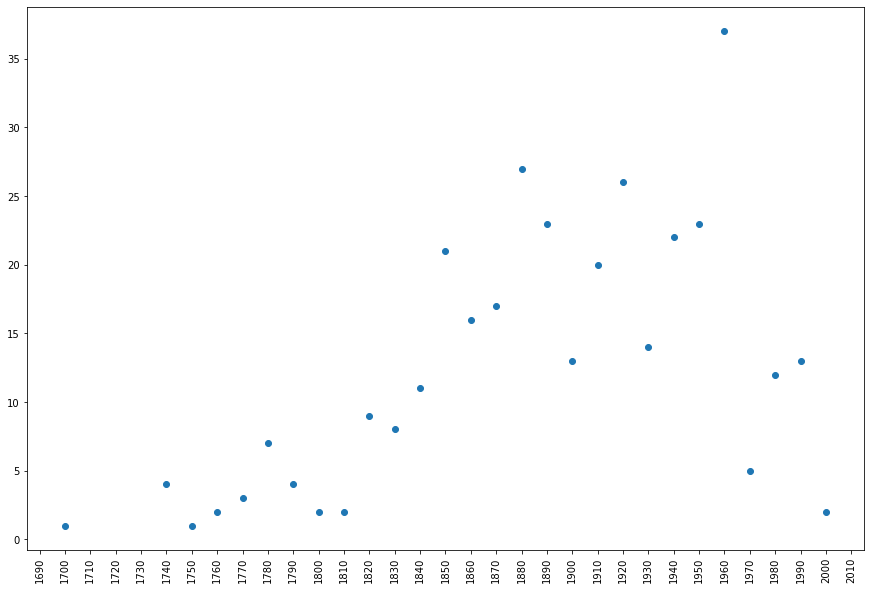

In [80]:
# Scatterplot
plt.figure(figsize=(15, 10))
plt.scatter(x=snp_colleges_nn_time_series["Year"],
            y=snp_colleges_nn_time_series["Count"])

plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.plot()

[]

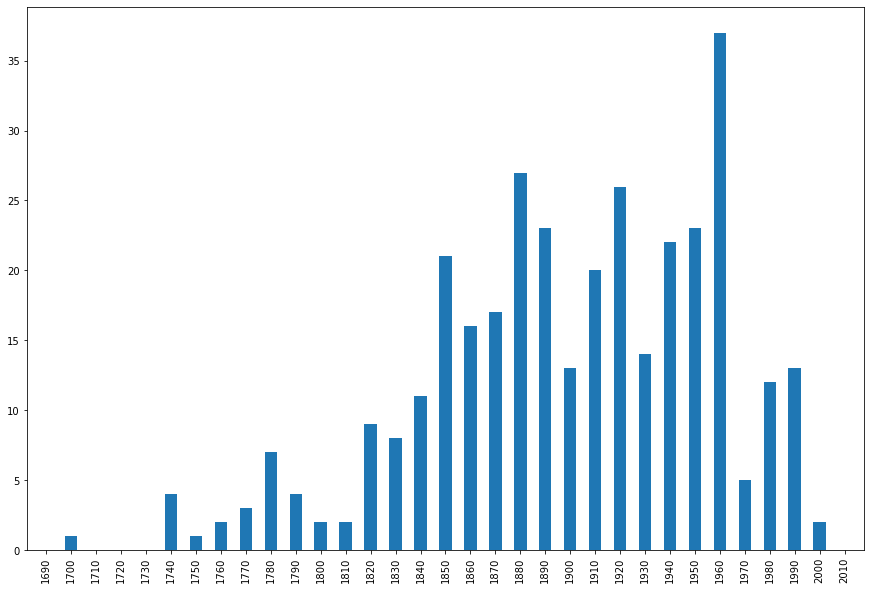

In [82]:
# Barplot
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.bar(x=snp_colleges_nn_time_series["Year"],
        height=snp_colleges_nn_time_series["Count"],
        width=5.)
plt.plot()

In [19]:
secular_non_profit_colleges["founded_in"].dt.year

1       1701.0
2       1740.0
3       1742.0
4       1746.0
5       1749.0
         ...  
2933    2008.0
2942    2009.0
2975       NaN
2976       NaN
2977       NaN
Name: founded_in, Length: 348, dtype: float64

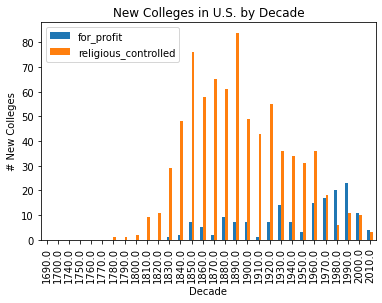

In [6]:
# Line chart of colleges founded by year
colleges_decades = colleges.groupby((colleges.founded_in.dt.year//10)*10).sum()
# print(decades)
colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

            for_profit  religious_controlled
founded_in                                  
1700.0               0                     0
1740.0               0                     0
1750.0               0                     0
1760.0               0                     0
1770.0               0                     0
1780.0               0                     0
1790.0               0                     0
1800.0               0                     0
1810.0               0                     0
1820.0               0                     0
1830.0               0                     0
1840.0               0                     0
1850.0               0                     0
1860.0               0                     0
1870.0               0                     0
1880.0               0                     0
1890.0               0                     0
1900.0               0                     0
1910.0               0                     0
1920.0               0                     0
1930.0    

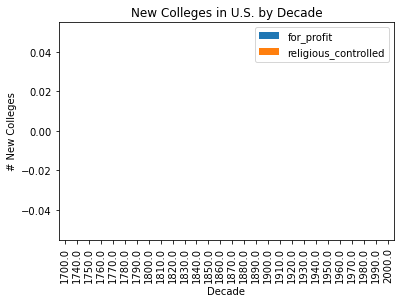

In [8]:
# Line chart of colleges founded by year
secular_non_profit_colleges_decades = secular_non_profit_colleges.groupby((secular_non_profit_colleges.founded_in.dt.year//10)*10).sum()
print(secular_non_profit_colleges_decades)
secular_non_profit_colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

### Below are the plots I'm working on,  haven't changed anything above //Johanna
1. All colleges founded by decade bar chart
2. Nonprofit, secular, bachelor’s degree granting colleges founded by decade bar chart
3. Comparison for profit, non profit colleges founded by decade.
4. Comparison religiously controlled, secular colleges founded by decade.

#### First, some processing and general setups 
Colleges with NaT in founded_in column: 
- Mount Liberty College (2019?)
- New U Univeresity (2019?) 
- University of Beverly Hills ("defunct")
- San Ignacio University (Doral) (don't find)
- Valley Forge Christian College (1939?)
- Washington Baptist University (1982?)

In [13]:
# 6 colleges have NaT in founded_in column, remove these for now - could be added manually though
colleges = colleges[~colleges["founded_in"].isnull()]

In [75]:
# ... or, add values found on internet for these
from datetime import datetime
college_year = [("Mount Liberty College", "2019"),             # https://www.liberalartscolleges.com/schools/mount-liberty-college/
                ("New U Univeresity", "2019"),                 # https://newu.university/about/
                ("Valley Forge Christian College", "1939"),    # https://valleyforge.edu/about/history/
                ("Washington Baptist University", "1982")]     # http://www.englisheducationguide.com/united_states/1871.htm
for college, year in college_year:
    colleges.loc[colleges["name"] == college, "founded_in"] = datetime.strptime(year, '%Y')
colleges = colleges[~colleges["founded_in"].isnull()]  # remove the remaining 2

In [77]:
# Make a "decade" column and some checks
colleges["decade"] = np.floor(colleges["founded_in"].dt.year/10)*10
colleges["decade"] = colleges["decade"].astype(int)
n_decades = len(colleges["decade"].unique())
min_decade = np.min(colleges["decade"].unique())
max_decade = np.max(colleges["decade"].unique())
print(f"Decade span: {min_decade} - {max_decade}")
print(f"Number of colleges: {len(colleges)}")
colleges.head(5)

Decade span: 1690 - 2010
Number of colleges: 1815


,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation,decade
0,College of William and Mary,Virginia,Williamsburg,Public,0,0,NaN,Doctoral University,NaN,1693-01-01,NaN,NaN,NaN,"8,817",NaN,SACS,1690
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN,1700
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN,1740
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN,1740
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE,1740


In [143]:
# Plotting setups
fig_size = (15, 10)
x_range = np.arange(min_decade, max_decade + 10, step=10)
bin_range = (min_decade - 5, max_decade + 5)
sns.set_palette("dark")
sns.set_theme(style="whitegrid")

plt.rc('font', size=14)    
plt.rc('axes', titlesize=14)  
plt.rc('axes', labelsize=12)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)  
plt.rc('legend', fontsize=10)   
plt.rc('figure', titlesize=14)  

### 1, All colleges founded by decade bar chart

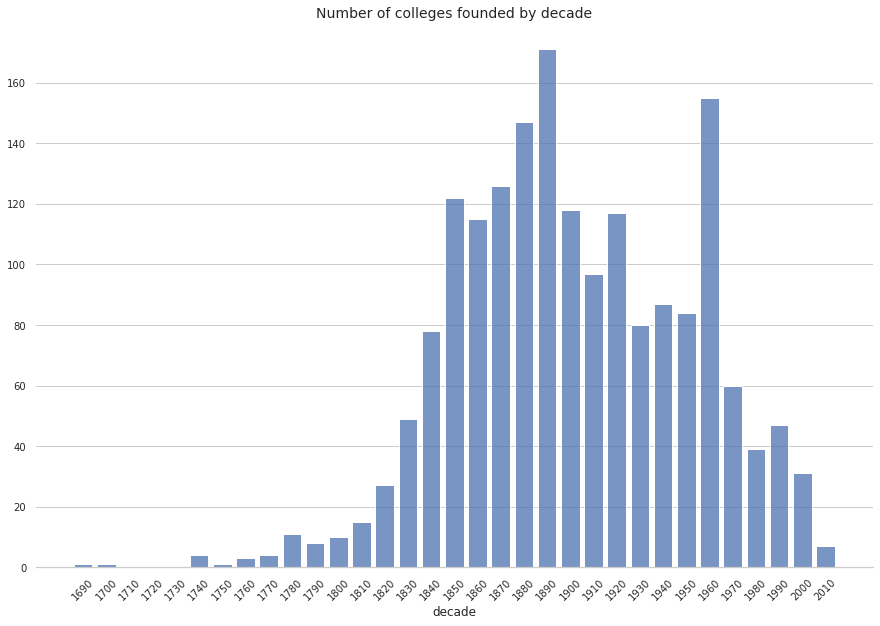

In [144]:
plt.figure(figsize=fig_size)
sns.histplot(data=colleges, x="decade", binwidth=10, binrange=bin_range, edgecolor = 'w', shrink=0.8)

plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Number of colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_1.png", facecolor='white')  # ignore facecolor for a transparent background

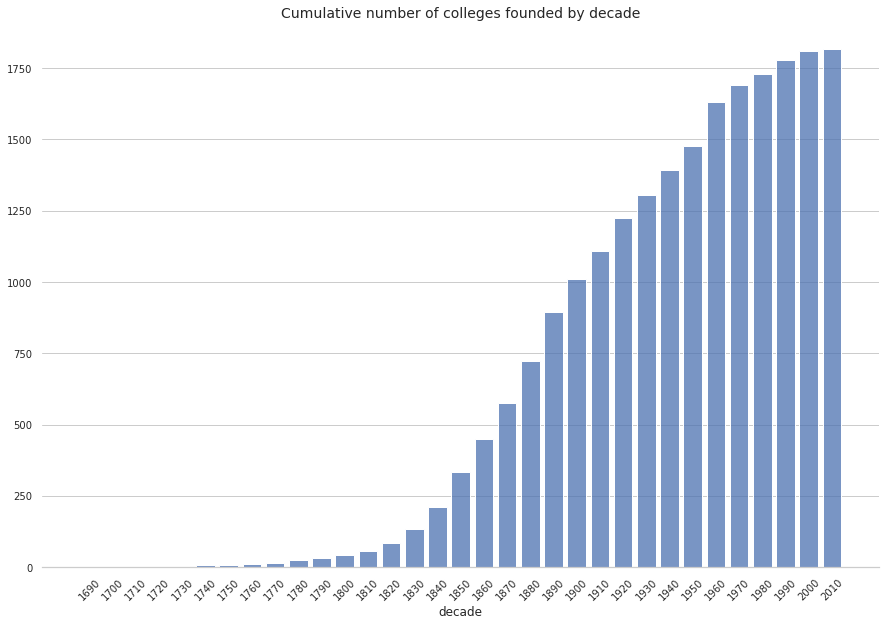

In [145]:
# cumulative number
plt.figure(figsize=fig_size)
sns.histplot(data=colleges, x="decade", binwidth=10, binrange=bin_range, cumulative=True, edgecolor = 'w', shrink=0.8)

plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Cumulative number of colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_1_cumulative.png", facecolor='white')

### 2, Nonprofit, secular, bachelor’s degree granting colleges founded by decade bar chart

In [146]:
# Same as given code above
secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]
secular_non_profit_colleges.head(5)

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation,decade
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN,1700
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN,1740
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN,1740
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE,1740
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS,1740


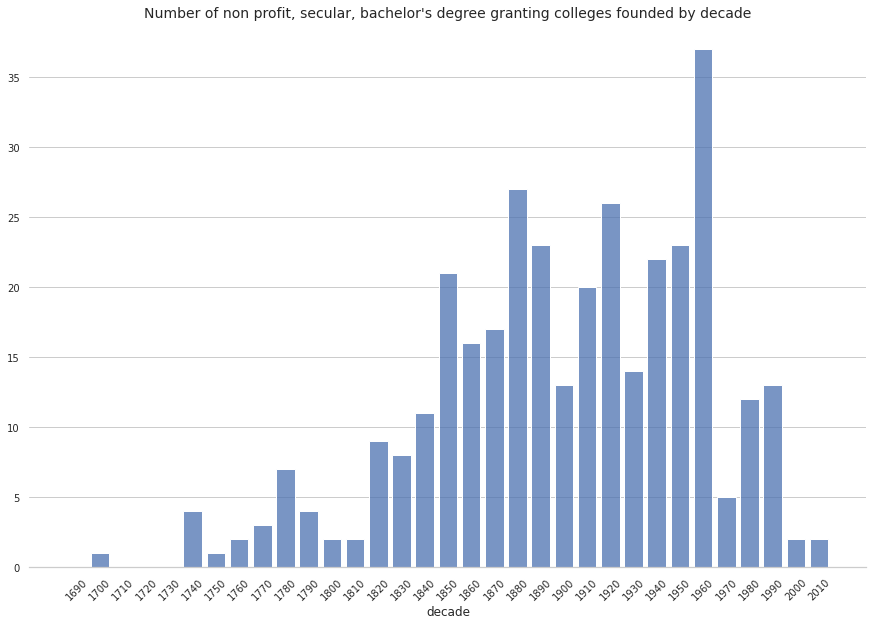

In [147]:
plt.figure(figsize=fig_size)
sns.histplot(data=secular_non_profit_colleges, x="decade", binwidth=10, binrange=bin_range, edgecolor = 'w', shrink=0.8)

plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Number of non profit, secular, bachelor's degree granting colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_2.png", facecolor='white')  # ignore facecolor for a transparent background

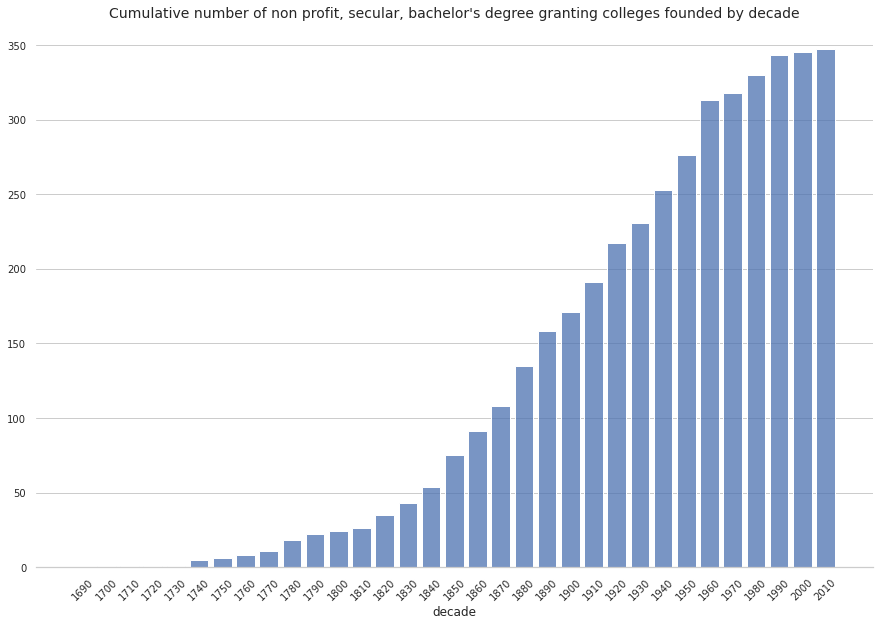

In [148]:
# cumulative number
plt.figure(figsize=fig_size)
sns.histplot(data=secular_non_profit_colleges, x="decade", binwidth=10, binrange=bin_range, cumulative=True, edgecolor = 'w', shrink=0.8)

plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Cumulative number of non profit, secular, bachelor's degree granting colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_2_cumulative.png", facecolor='white')

### 3. Comparison for profit, non profit colleges founded by decade.

Tried some different workarounds to get good legends for this and next plots. This tweak of renaming into strings seems to be the safest. Keeping 0 and 1 in the column and hardcoding the legends seems risky since the order gets reversed.

In [149]:
profits = colleges.copy()
profits['for_profit'] = profits['for_profit'].astype(str)
profits['for_profit'] = profits['for_profit'].str.replace('0', 'Non profit')
profits['for_profit'] = profits['for_profit'].str.replace('1', 'Profit')

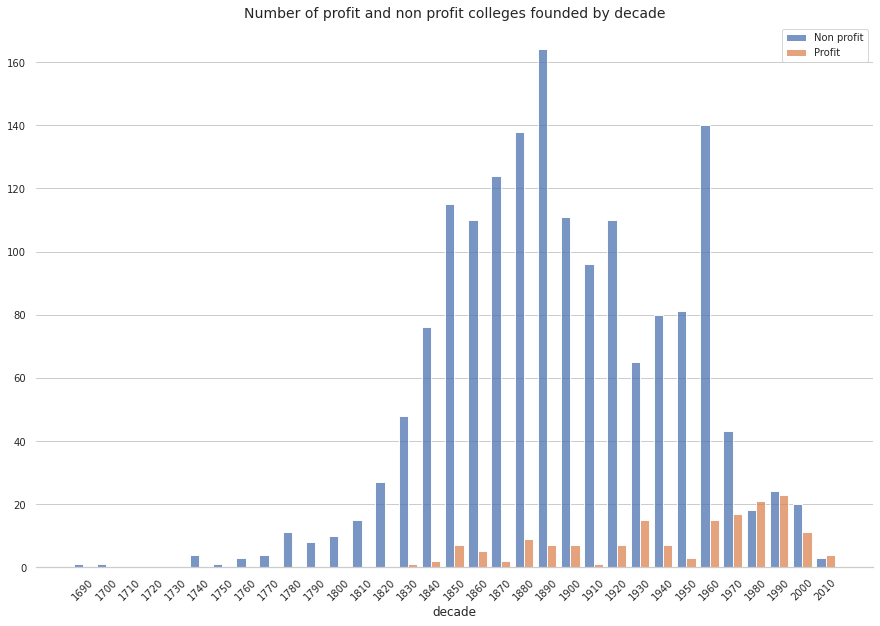

In [150]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=profits, x="decade", hue="for_profit", multiple="dodge", binwidth=10, binrange=bin_range, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Number of profit and non profit colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_3.png", facecolor='white')  # ignore facecolor for a transparent background

In [ ]:
# This also works with original colleges dataframe, but don't want to hardcode legends like this
# plt.figure(figsize=fig_size)
# plt.xticks(x_range, rotation=45)
# sns.histplot(data=colleges, x="decade", hue="for_profit", multiple="dodge", binwidth=10, binrange=bin_range)
# plt.legend(loc='upper right', labels=['Profit', 'Non profit'])
# plt.title("Number of profit and non profit colleges founded by decade")
# sns.despine(left=True)
# plt.grid(axis='x')

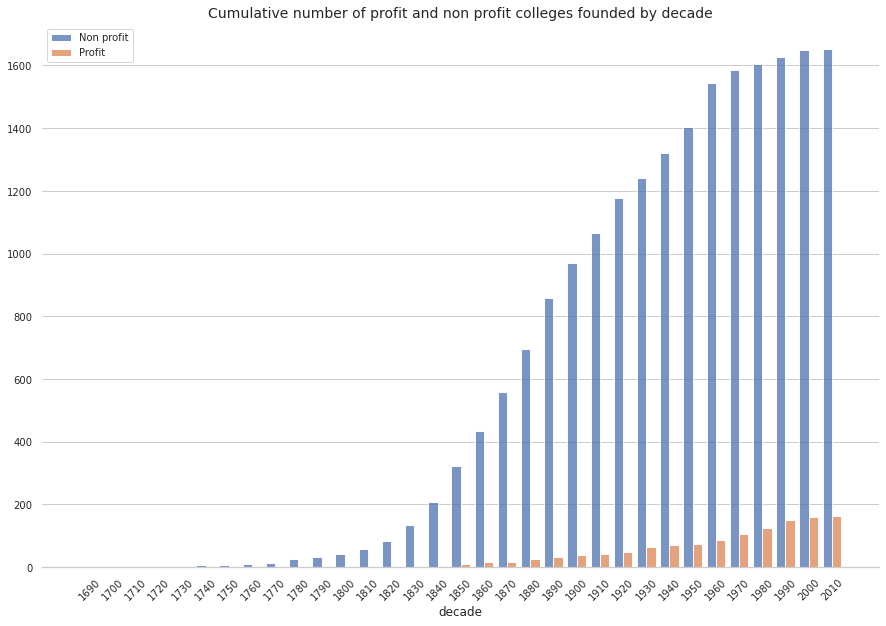

In [151]:
# cumulative number
plt.figure(figsize=fig_size)
g = sns.histplot(data=profits, x="decade", hue="for_profit", multiple="dodge", binwidth=10, binrange=bin_range, cumulative=True, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Cumulative number of profit and non profit colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_3_cumulative.png", facecolor='white')

### 4. Comparison religiously controlled, secular colleges founded by decade.

In [152]:
control = colleges.copy()
control['religious_controlled'] = control['religious_controlled'].astype(str)
control['religious_controlled'] = control['religious_controlled'].str.replace('0', 'Secular')
control['religious_controlled'] = control['religious_controlled'].str.replace('1', 'Religiously')

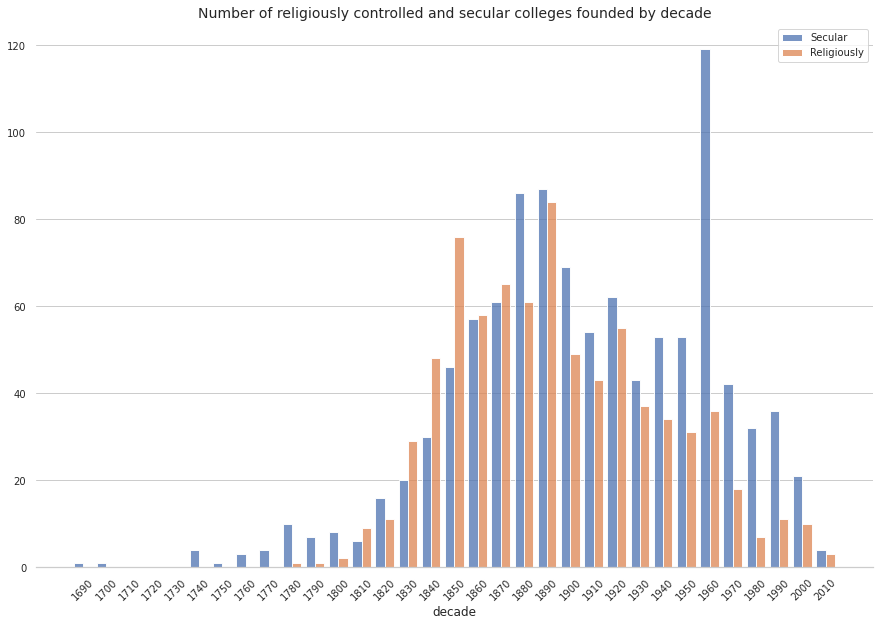

In [153]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=control, x="decade", hue="religious_controlled", multiple="dodge", binwidth=10, binrange=bin_range, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Number of religiously controlled and secular colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_4.png", facecolor='white')  # ignore facecolor for a transparent background

In [ ]:
# This also works with original colleges dataframe, but don't want to hardcode legends like this
# plt.figure(figsize=fig_size)
# sns.histplot(data=colleges, x="decade", hue="religious_controlled", multiple="dodge", binwidth=10, binrange=bin_range)
# plt.xticks(x_range, rotation=45)
# plt.legend(loc='upper right', labels=['Religiously', 'Secular'])
# plt.title("Number of religiously controlled and secular colleges founded by decade")
# sns.despine(left=True)
# plt.grid(axis='x')

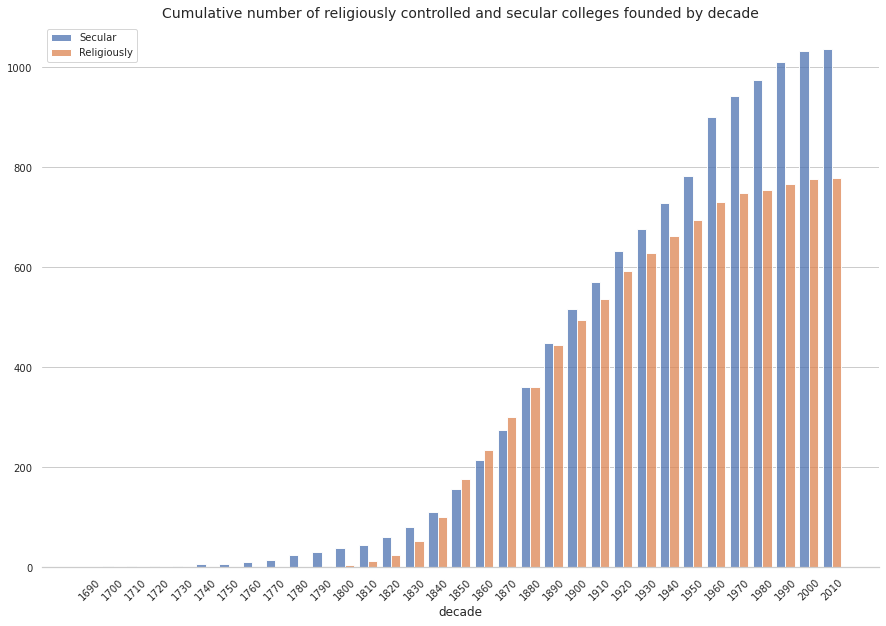

In [154]:
# seaborn cumulative histogram
plt.figure(figsize=fig_size)
g = sns.histplot(data=control, x="decade", hue="religious_controlled", multiple="dodge", binwidth=10, binrange=bin_range, cumulative=True, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(x_range, rotation=45)
plt.ylabel('')
plt.title("Cumulative number of religiously controlled and secular colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_4_cumulative.png", facecolor='white')